In [1]:
# Author : Arthur Prigent
# Email: aprigent@geomar.de

In [16]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
lon_min = -40
lon_max = 5
lat_min = -3
lat_max = 3

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a

######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'


# Figure S1 STD SSTa and uwinda changes

In [17]:
std_ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'std_ssta_hist_monthly_CMIP5.nc')
std_ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'std_ssta_ssp5_monthly_CMIP5.nc')

std_ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'std_ssta_hist_monthly_CMIP6.nc')
std_ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'std_ssta_ssp585_monthly_CMIP6.nc')

In [18]:

std_uasa_atl4_hist_cmip6 = xr.open_dataset(path_data+'std_uasa_hist_monthly_CMIP6.nc')
std_uasa_atl4_ssp5_cmip6 = xr.open_dataset(path_data+'std_uasa_ssp5_monthly_CMIP6.nc')

std_uasa_atl4_hist_cmip5 = xr.open_dataset(path_data+'std_uasa_hist_monthly_CMIP5.nc')
std_uasa_atl4_ssp5_cmip5 = xr.open_dataset(path_data+'std_uasa_ssp5_monthly_CMIP5.nc')


In [19]:
std_ssta_atl3_hist_cmip5_jja_mean =  std_ssta_atl3_hist_cmip5.sel(month=is_jja(
    std_ssta_atl3_hist_cmip5['month'])).mean(dim='month')

std_ssta_atl3_ssp5_cmip5_jja_mean =  std_ssta_atl3_ssp5_cmip5.sel(month=is_jja(
    std_ssta_atl3_ssp5_cmip5['month'])).mean(dim='month')

std_ssta_atl3_hist_cmip6_jja_mean =  std_ssta_atl3_hist_cmip6.sel(month=is_jja(
    std_ssta_atl3_hist_cmip6['month'])).mean(dim='month')

std_ssta_atl3_ssp5_cmip6_jja_mean =  std_ssta_atl3_ssp5_cmip6.sel(month=is_jja(
    std_ssta_atl3_ssp5_cmip6['month'])).mean(dim='month')

In [20]:
std_uasa_atl4_hist_cmip5_mjj_mean =  std_uasa_atl4_hist_cmip5.sel(month=is_mjj(
    std_uasa_atl4_hist_cmip5['month'])).mean(dim='month')

std_uasa_atl4_ssp5_cmip5_mjj_mean =  std_uasa_atl4_ssp5_cmip5.sel(month=is_mjj(
    std_uasa_atl4_ssp5_cmip5['month'])).mean(dim='month')

std_uasa_atl4_hist_cmip6_mjj_mean =  std_uasa_atl4_hist_cmip6.sel(month=is_mjj(
    std_uasa_atl4_hist_cmip6['month'])).mean(dim='month')

std_uasa_atl4_ssp5_cmip6_mjj_mean =  std_uasa_atl4_ssp5_cmip6.sel(month=is_mjj(
    std_uasa_atl4_ssp5_cmip6['month'])).mean(dim='month')

In [21]:
std_ssta_atl3_ssp5_cmip6_jja_ensmean = std_ssta_atl3_ssp5_cmip6_jja_mean.mean(dim='model')
std_ssta_atl3_hist_cmip6_jja_ensmean = std_ssta_atl3_hist_cmip6_jja_mean.mean(dim='model')


std_ssta_atl3_ssp5_cmip5_jja_ensmean = std_ssta_atl3_ssp5_cmip5_jja_mean.mean(dim='model')
std_ssta_atl3_hist_cmip5_jja_ensmean = std_ssta_atl3_hist_cmip5_jja_mean.mean(dim='model')

In [22]:
std_uasa_atl4_ssp5_cmip6_mjj_ensmean = std_uasa_atl4_ssp5_cmip6_mjj_mean.mean(dim='model')
std_uasa_atl4_hist_cmip6_mjj_ensmean = std_uasa_atl4_hist_cmip6_mjj_mean.mean(dim='model')


std_uasa_atl4_ssp5_cmip5_mjj_ensmean = std_uasa_atl4_ssp5_cmip5_mjj_mean.mean(dim='model')
std_uasa_atl4_hist_cmip5_mjj_ensmean = std_uasa_atl4_hist_cmip5_mjj_mean.mean(dim='model')

In [23]:
std_ssta_ensmean_cmip6 = std_ssta_atl3_ssp5_cmip6_jja_ensmean - std_ssta_atl3_hist_cmip6_jja_ensmean

std_uasa_ensmean_cmip6 = std_uasa_atl4_ssp5_cmip6_mjj_ensmean - std_uasa_atl4_hist_cmip6_mjj_ensmean


std_ssta_ensmean_cmip5 = std_ssta_atl3_ssp5_cmip5_jja_ensmean - std_ssta_atl3_hist_cmip5_jja_ensmean

std_uasa_ensmean_cmip5 = std_uasa_atl4_ssp5_cmip5_mjj_ensmean - std_uasa_atl4_hist_cmip5_mjj_ensmean

In [24]:
std_ssta_atl3_change_jja_cmip5 =std_ssta_atl3_ssp5_cmip5_jja_mean - std_ssta_atl3_hist_cmip5_jja_mean

std_uasa_atl4_change_mjj_cmip5 = std_uasa_atl4_ssp5_cmip5_mjj_mean - std_uasa_atl4_hist_cmip5_mjj_mean


std_ssta_atl3_change_jja_cmip6 =std_ssta_atl3_ssp5_cmip6_jja_mean - std_ssta_atl3_hist_cmip6_jja_mean

std_uasa_atl4_change_mjj_cmip6 = std_uasa_atl4_ssp5_cmip6_mjj_mean - std_uasa_atl4_hist_cmip6_mjj_mean

In [25]:
std_ssta_combined_jja = np.hstack([std_ssta_atl3_change_jja_cmip6.ssta_std.values,
                              std_ssta_atl3_change_jja_cmip5.ssta_std.values])
std_uasa_combined_mjj = np.hstack([std_uasa_atl4_change_mjj_cmip6.uasa_std.values,
                              std_uasa_atl4_change_mjj_cmip5.uasa_std.values])

In [26]:
alpha0, interp0, r0, p_value0, std0 = stats.linregress(std_uasa_combined_mjj,std_ssta_combined_jja)

In [27]:
x0 = np.arange(-0.7,0.4,0.1)
y0 = x0*alpha0 + interp0
n_replicate = 10000
N = std_uasa_combined_mjj.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(std_uasa_combined_mjj[ind_resample],
                                   std_ssta_combined_jja[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x0[:, np.newaxis] + result[:, 1]
ci_forecast_uasa_ssta = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

Text(0.03, 0.97, '$s=0.43$ $\\pm$ 0.10 K$\\cdot$(m$\\cdot$s$^{-1}$)$^{-1}$\n$R^{2}=0.33$\np-value < 0.01')

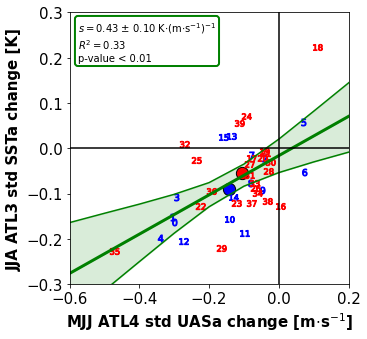

In [28]:
f,ax = plt.subplots(1,1,figsize=[5,5])
x0 = np.arange(-0.7,0.4,0.1)
y0 = x0*alpha0 + interp0
m_cmip6 = np.arange(0,std_ssta_atl3_hist_cmip6_jja_mean.ssta_std.shape[0],1)
m_cmip5 = np.arange(std_ssta_atl3_hist_cmip6_jja_mean.ssta_std.shape[0],
                    std_ssta_atl3_hist_cmip6_jja_mean.ssta_std.shape[0] + 
                    std_ssta_atl3_change_jja_cmip5.ssta_std.shape[0],1)
ax.plot(x0,y0,linewidth=3,color='green')

ax.plot(x0, ci_forecast_uasa_ssta[0], 'green')
ax.plot(x0, ci_forecast_uasa_ssta[1], 'green')
ax.fill_between(x0,y0,ci_forecast_uasa_ssta[0],color='green',alpha=0.15)
ax.fill_between(x0,y0,ci_forecast_uasa_ssta[1],color='green',alpha=0.15)



ftz=15

ax.scatter(std_uasa_ensmean_cmip6.uasa_std,std_ssta_ensmean_cmip6.ssta_std,color='blue',s=150,
           edgecolors='black')

ax.scatter(std_uasa_ensmean_cmip5.uasa_std,std_ssta_ensmean_cmip5.ssta_std,color='red',s=150,
           edgecolors='black')

for i in range(std_ssta_atl3_hist_cmip6_jja_mean.model.shape[0]):
    if i<10:
        ax.scatter(std_uasa_atl4_change_mjj_cmip6.uasa_std[i],std_ssta_atl3_change_jja_cmip6.ssta_std[i],color='blue',
              marker=r"$ {} $".format(m_cmip6[i]),s=50)
    else:
        ax.scatter(std_uasa_atl4_change_mjj_cmip6.uasa_std[i],std_ssta_atl3_change_jja_cmip6.ssta_std[i],color='blue',
              marker=r"$ {} $".format(m_cmip6[i]),s=100)

for k in range(std_ssta_atl3_hist_cmip5_jja_mean.model.shape[0]):
    ax.scatter(std_uasa_atl4_change_mjj_cmip5.uasa_std[k],std_ssta_atl3_change_jja_cmip5.ssta_std[k],color='red',
              marker=r"$ {} $".format(m_cmip5[k]),s=100)
    
ax.set_xlabel('MJJ ATL4 std UASa change [m$\cdot$s$^{-1}$]',fontsize=ftz,fontweight='bold')
ax.set_ylabel('JJA ATL3 std SSTa change [K]',fontsize=ftz,fontweight='bold')
ax.tick_params(labelsize=ftz)
ax.set_xlim([-0.6,0.2])
ax.set_ylim([-0.3,0.3])

ax.axhline(0,color='black')
ax.axvline(0,color='black')

textstr = '\n'.join((r'$s=%.2f$ $\pm$ %.2f K$\cdot$(m$\cdot$s$^{-1}$)$^{-1}$' %
                     (alpha0, std0),
                     r'$R^{2}=%.2f$' % (r0**2, ),
                    'p-value < 0.01'))
props = dict(boxstyle='round', facecolor='white', ec='green', lw=2)

# place a text box in upper left in axes coords
ax.text(0.03,
         0.97,
         textstr,
         transform=ax.transAxes,
         fontsize=ftz-5,
         verticalalignment='top',
         bbox=props)


#plt.savefig(path_fig + 'figure_S1.png',
#             dpi = 300,
#            bbox_inches='tight')